# DIABETES Diagnostics



This dataset is a part of original larger dataset from the National Institute of Diabetes and Digestive and Kidney Diseases. 
Here the objective is to predict whether a patient has diabetes based on diagnostic measurements

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age: Age (years)
    Outcome: Class variable (0 or 1)


Number of Instances: 768
Number of Attributes: 8 plus class
For Each Attribute: (all numeric-valued)


## Import libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


# import models
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

## Explorative data analysis

In [119]:
data_path = "diabetes.csv"
data = pd.read_csv(data_path)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [120]:
print("info:--------")
print(data.info())
print("describe: \n")
print(data.describe())
print('NAN \n',data.isna().sum())

info:--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
describe: 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

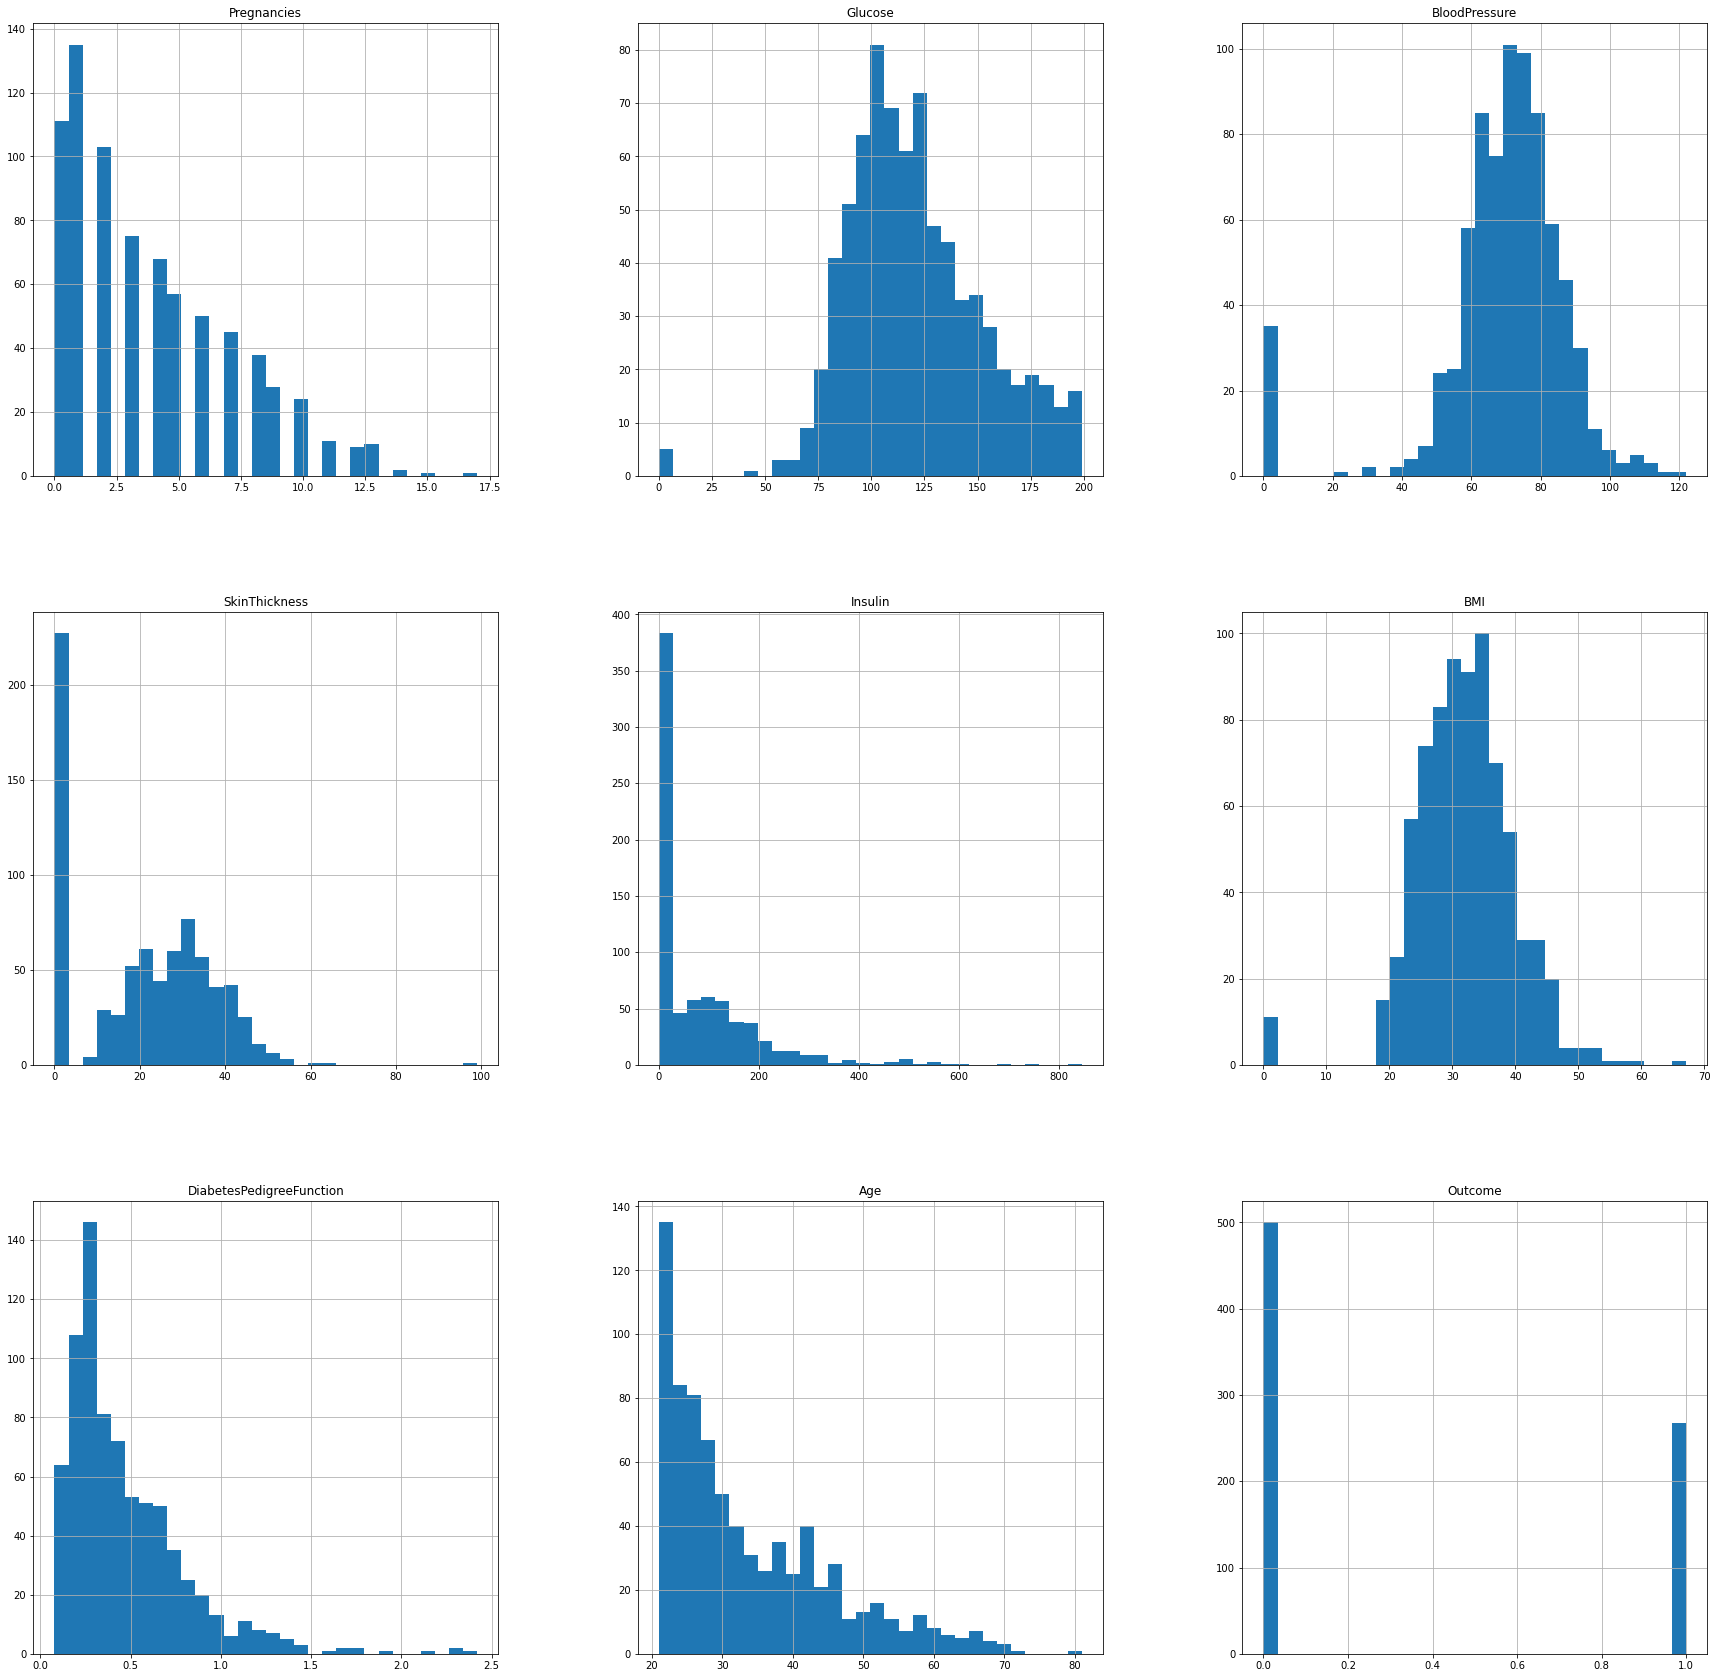

In [121]:
data.hist(bins=30,figsize=[30,30])

1. through there is no NA values, there are 0 values form glucose,blood pressure, insulin, BMI,skinthickness. Hence replace them with NA as it is impossible for these values to be zero.


2. replace these missing values with median values of these columns for both the outcomes.


In [122]:
data1 = data.copy()
data1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<AxesSubplot:>

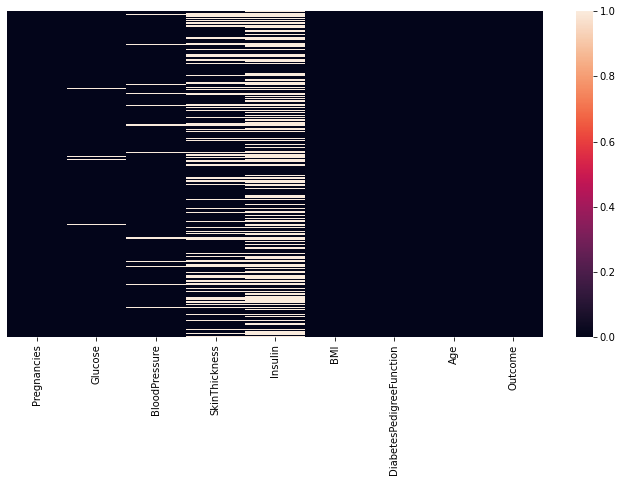

In [123]:
figure = plt.figure(figsize=(12,6))
sns.heatmap(data1.isnull(),yticklabels=False)

In [124]:
def col_median_values(col):
    col_data = data1[data1[col].notnull()]
    median_value = col_data[[col,'Outcome']].groupby('Outcome').median().reset_index()
    return median_value.to_dict()

In [125]:
col_median_values('BloodPressure')

{'Outcome': {0: 0, 1: 1}, 'BloodPressure': {0: 70.0, 1: 74.5}}

In [126]:
col_list = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in col_list:
    print(i)
    median_values_col = col_median_values(i)[i]
    print('median_values_col',median_values_col)
    data1.loc[(data1[i].isnull()) & (data1['Outcome']==0),i] = median_values_col[0]
    data1.loc[(data1[i].isnull()) & (data1['Outcome']==1),i] = median_values_col[1]

Glucose
median_values_col {0: 107.0, 1: 140.0}
BloodPressure
median_values_col {0: 70.0, 1: 74.5}
SkinThickness
median_values_col {0: 27.0, 1: 32.0}
Insulin
median_values_col {0: 102.5, 1: 169.5}
BMI
median_values_col {0: 30.1, 1: 34.3}


In [127]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<AxesSubplot:>

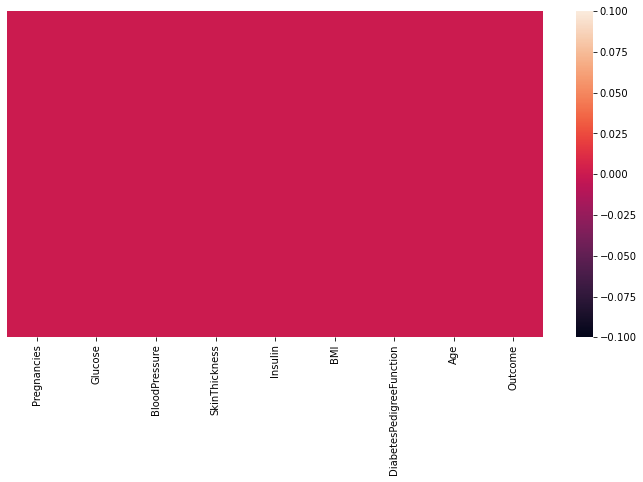

In [128]:
figure = plt.figure(figsize=(12,6))
sns.heatmap(data1.isnull(),yticklabels=False)

# Creating additional features
## Insulin
#### Insulin level:
https://www.medicinenet.com/what_is_a_high_insulin_level/article.htm#what_are_normal_insulin_levels  

    normal value is 16-166 mIU/L

In [129]:
insulin_class = ['Low','Normal','High']
data1.loc[data1['Insulin']<16,'Insulin_class']=insulin_class[0]
data1.loc[(data1['Insulin']>=16)& (data1['Insulin']<=166),'Insulin_class']=insulin_class[1]
data1.loc[data1['Insulin']>166,'Insulin_class']=insulin_class[2]
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_class
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,High
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,High
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,High
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,High
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,Normal
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Normal
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,High


## Encoding

In [130]:
cols = ['Insulin_class']
dummies = pd.get_dummies(data1[cols])
data1 = pd.concat([data1,dummies],axis=1)
data1.drop(cols,axis=1,inplace=True)
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_class_High,Insulin_class_Low,Insulin_class_Normal
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,1,0,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,0,0,1
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,0,0,1
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,1,0,0


In [131]:
x = data1.drop(['Outcome'],axis=1)
y = data['Outcome']
print(x.head(5),"\n\n")
print(y.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Insulin_class_High  Insulin_class_Low  \
0                     0.627   50                   1                  0   
1                     0.351   31                   0                  0   
2                     0.672   32                   1                  0   
3                     0.167   21                   0                  0   
4                     2.288   33                   1                  0   

   Insulin_class_Normal  
0                     0  
1                     1  
2                     0  
3           

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1234)

# Models

In [133]:
models = []
random_state = 1234
models.append(('LR', LogisticRegression(random_state = random_state,solver='liblinear',max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = random_state)))
models.append(('RF', RandomForestClassifier(random_state = random_state)))
models.append(('SVM', SVC(gamma='auto', random_state = random_state)))
models.append(('XGB', GradientBoostingClassifier(random_state = random_state)))
models.append(("LightGBM", LGBMClassifier(random_state = random_state)))

models

[('LR',
  LogisticRegression(max_iter=1000, random_state=1234, solver='liblinear')),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier(random_state=1234)),
 ('RF', RandomForestClassifier(random_state=1234)),
 ('SVM', SVC(gamma='auto', random_state=1234)),
 ('XGB', GradientBoostingClassifier(random_state=1234)),
 ('LightGBM', LGBMClassifier(random_state=1234))]

In [134]:
results_i = []        # initial results before tuning
names_i   = []

for name, model in models:
    print("name :",name)
    print("model :",model)
    
#     kfold = KFold(n_splits = 10)
        
    cv_results = cross_val_score(model, x, y, cv = 10, scoring= "accuracy")
    print(cv_results,"\n")
    results_i.append(cv_results)
    names_i.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

name : LR
model : LogisticRegression(max_iter=1000, random_state=1234, solver='liblinear')
[0.8961039  0.84415584 0.83116883 0.8961039  0.87012987 0.90909091
 0.83116883 0.88311688 0.77631579 0.80263158] 

LR: 0.853999 (0.041835)
name : KNN
model : KNeighborsClassifier()
[0.85714286 0.88311688 0.84415584 0.83116883 0.83116883 0.88311688
 0.81818182 0.88311688 0.85526316 0.82894737] 

KNN: 0.851538 (0.023546)
name : CART
model : DecisionTreeClassifier(random_state=1234)
[0.85714286 0.84415584 0.84415584 0.83116883 0.81818182 0.77922078
 0.85714286 0.85714286 0.82894737 0.90789474] 

CART: 0.842515 (0.031357)
name : RF
model : RandomForestClassifier(random_state=1234)
[0.92207792 0.88311688 0.83116883 0.85714286 0.84415584 0.92207792
 0.88311688 0.93506494 0.89473684 0.90789474] 

RF: 0.888055 (0.033363)
name : SVM
model : SVC(gamma='auto', random_state=1234)
[0.64935065 0.64935065 0.64935065 0.64935065 0.64935065 0.64935065
 0.64935065 0.64935065 0.65789474 0.65789474] 

SVM: 0.651059 (

<AxesSubplot:>

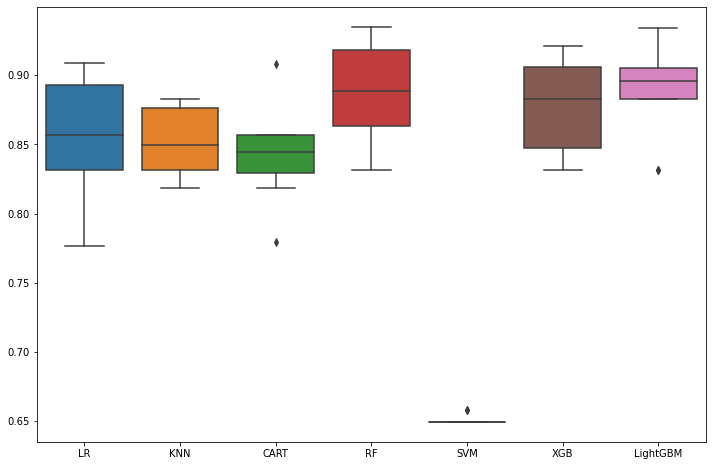

In [135]:
results_df_i = pd.DataFrame(np.array(results_i).transpose(),columns=names_i)
plt.figure(figsize=[12,8])
sns.boxplot(data=results_df_i)

randomforest, xgb and lightgbm giving better result. lets tune them.

# model_tuning

In [137]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin_class_High',
       'Insulin_class_Low', 'Insulin_class_Normal'],
      dtype='object')

In [138]:
len(x.columns)

11

## random forest

In [139]:
rf_params = {"max_depth": [2, 5, 8, 10],
          "max_features": [5, 8,len(x.columns)],
          "n_estimators": [100, 500, 1000,1500],
          "min_samples_split": [2, 5, 10,20]}

rf_model = RandomForestClassifier(random_state = 12345)


In [140]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 5,
                    n_jobs = -1,
                    verbose = 2).fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [141]:
print(gs_cv.best_params_)
print(gs_cv.best_score_)

{'max_depth': 8, 'max_features': 11, 'min_samples_split': 10, 'n_estimators': 1500}
0.8892443022790882


In [142]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_,random_state=1234)
rf_tuned = rf_tuned.fit(x_train,y_train)

results = cross_val_score(rf_tuned, x_train, y_train, cv = 10)
print(results,results.mean(),results.std())



[0.88709677 0.93548387 0.9516129  0.74193548 0.86885246 0.8852459
 0.93442623 0.93442623 0.86885246 0.83606557] 0.8843997884717082 0.05937691371819521


<AxesSubplot:xlabel='importance', ylabel='features'>

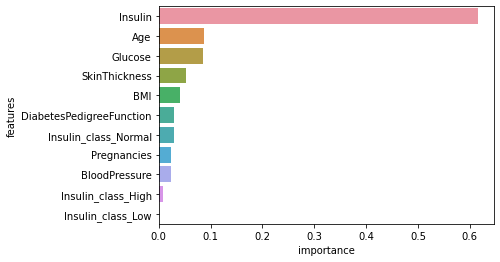

In [143]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features']=x_train.columns
feature_importance_df['importance']=rf_tuned.feature_importances_
feature_importance_df.sort_values('importance',ascending=False,inplace=True)
sns.barplot(x='importance',y='features',data = feature_importance_df)

## xgb tuning

In [144]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 5),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000,1500]}

In [145]:
xgb = GradientBoostingClassifier(random_state=1234)

xgb_gscv = GridSearchCV(xgb, xgb_params,cv = 5,
                    n_jobs = -1,
                    verbose = 2).fit(x_train, y_train)




Fitting 5 folds for each of 405 candidates, totalling 2025 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=0.5; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=0.9; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=0.9; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=1.0; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=1000, subsample=0.9; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=1000, subsample=1.0; total time=  

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=0.9; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=1.0; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=0.9; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=0.5; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=0.9; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=0.5; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=0.9; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=1000, subsample=0.5; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=1000, subsample=1.0; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=1500, subsample=0.5; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_spl

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=0.5; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=1.0; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=0.5; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=1.0; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=1000, subsample=0.5; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=1000, subsample=1.0; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_spli

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=0.5; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=1.0; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=0.5; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=1.0; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=1000, subsample=0.9; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=1000, subsample=1.0; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_spli

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=0.9; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=0.5; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=0.9; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=0.9; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=1.0; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=0.9; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=1.0; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=1000, subsample=0.9; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=1500, subsample=0.5; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_spli

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=0.5; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1000, subsample=1.0; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=0.5; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.1, n_estimators=1500, subsample=1.0; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=1000, subsample=0.5; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=0.2, n_estimators=1000, subsample=1.0; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_spli

In [147]:
print(xgb_gscv.best_params_)
print(xgb_gscv.best_score_)

{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 0.1, 'n_estimators': 1000, 'subsample': 1.0}
0.882713581234173


In [148]:
xgb_best = GradientBoostingClassifier(**xgb_gscv.best_params_,random_state=1234)


xgb_best.fit(x_train,y_train)

results_1 = cross_val_score(xgb_best, x_train, y_train, cv = 10)
print(results_1,results_1.mean(),results_1.std())

[0.87096774 0.91935484 0.93548387 0.79032258 0.8852459  0.85245902
 0.95081967 0.91803279 0.8852459  0.85245902] 0.886039132734003 0.04518865191240244


<AxesSubplot:xlabel='importance', ylabel='features'>

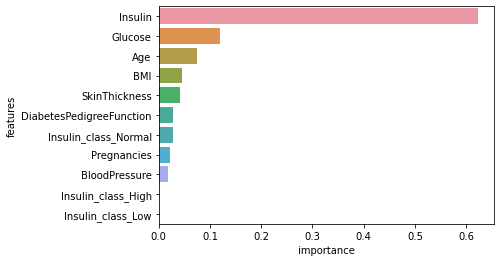

In [149]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features']=x_train.columns
feature_importance_df['importance']=xgb_best.feature_importances_
feature_importance_df.sort_values('importance',ascending=False,inplace=True)
sns.barplot(x='importance',y='features',data = feature_importance_df)

## lightgbm tuning

In [150]:
lgbm = LGBMClassifier(random_state = 1234)
                      

lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1,], "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}

lgbm_gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [151]:
print(lgbm_gs_cv.best_params_)
print(lgbm_gs_cv.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.8876255949233209


In [152]:
lgbm_best = GradientBoostingClassifier(**lgbm_gs_cv.best_params_).fit(x_train,y_train)

results_2 = cross_val_score(lgbm_best, x_train, y_train, cv = 10)
print(results_2,results_2.mean(),results_2.std())

[0.85483871 0.9516129  0.91935484 0.74193548 0.90163934 0.85245902
 0.90163934 0.90163934 0.8852459  0.81967213] 0.8730037017451083 0.05631419996131762


<AxesSubplot:xlabel='importance', ylabel='features'>

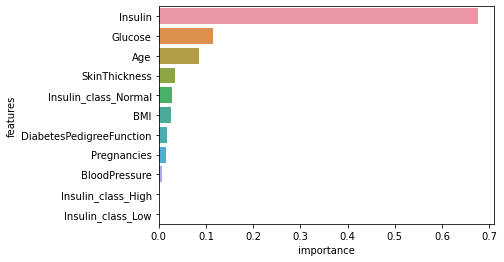

In [153]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features']=x_train.columns
feature_importance_df['importance']=lgbm_best.feature_importances_
feature_importance_df.sort_values('importance',ascending=False,inplace=True)
sns.barplot(x='importance',y='features',data = feature_importance_df)

<AxesSubplot:>

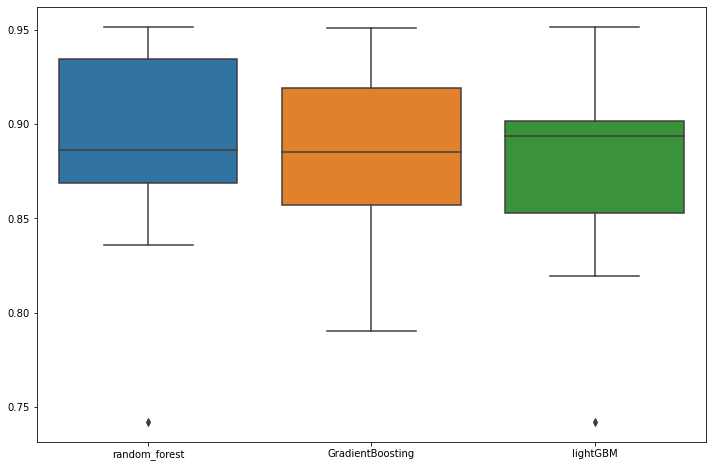

In [154]:
tuned_results = pd.DataFrame(np.array([results,results_1,results_2]).transpose(),
                             columns=['random_forest',"GradientBoosting","lightGBM"])
plt.figure(figsize=[12,8])
sns.boxplot(data=tuned_results)
                             

will use random forest for the prediction.

### model improvement after tuning

In [155]:
results_before_tuning = results_df_i.copy()[['RF','XGB','LightGBM']]
results_before_tuning['status'] = 'before_tuning'
results_before_tuning

,RF,XGB,LightGBM,status
0,0.922078,0.896104,0.883117,before_tuning
1,0.883117,0.844156,0.896104,before_tuning
2,0.831169,0.857143,0.831169,before_tuning
3,0.857143,0.844156,0.883117,before_tuning
4,0.844156,0.831169,0.831169,before_tuning
5,0.922078,0.883117,0.896104,before_tuning
6,0.883117,0.883117,0.896104,before_tuning
7,0.935065,0.909091,0.922078,before_tuning
8,0.894737,0.921053,0.934211,before_tuning
9,0.907895,0.921053,0.907895,before_tuning


In [156]:
comparison_df = tuned_results.copy()
comparison_df['status']='after_tuning'
comparison_df

,random_forest,GradientBoosting,lightGBM,status
0,0.887097,0.870968,0.854839,after_tuning
1,0.935484,0.919355,0.951613,after_tuning
2,0.951613,0.935484,0.919355,after_tuning
3,0.741935,0.790323,0.741935,after_tuning
4,0.868852,0.885246,0.901639,after_tuning
5,0.885246,0.852459,0.852459,after_tuning
6,0.934426,0.950820,0.901639,after_tuning
7,0.934426,0.918033,0.901639,after_tuning
8,0.868852,0.885246,0.885246,after_tuning
9,0.836066,0.852459,0.819672,after_tuning


In [157]:
results_before_tuning.columns = comparison_df.columns
comparison_df_i = pd.concat([comparison_df,results_before_tuning])
# results_before_tuning
comparison_df_i

,random_forest,GradientBoosting,lightGBM,status
0,0.887097,0.870968,0.854839,after_tuning
1,0.935484,0.919355,0.951613,after_tuning
2,0.951613,0.935484,0.919355,after_tuning
3,0.741935,0.790323,0.741935,after_tuning
4,0.868852,0.885246,0.901639,after_tuning
5,0.885246,0.852459,0.852459,after_tuning
6,0.934426,0.950820,0.901639,after_tuning
7,0.934426,0.918033,0.901639,after_tuning
8,0.868852,0.885246,0.885246,after_tuning
9,0.836066,0.852459,0.819672,after_tuning


<AxesSubplot:xlabel='variable', ylabel='value'>

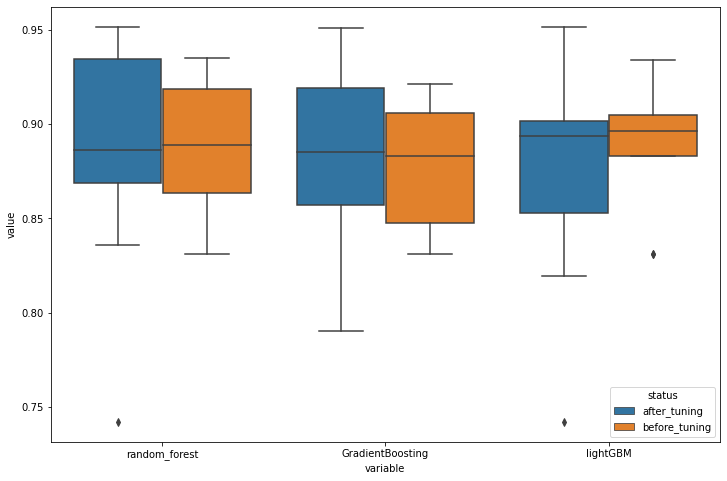

In [158]:
plt.figure(figsize=[12,8])
sns.boxplot(data=comparison_df_i.melt(id_vars='status'),x='variable',y='value',hue='status')

# validation

In [159]:
print("rf_tuned \n",classification_report(y_test,rf_tuned.predict(x_test)))
print("xgb_best \n",classification_report(y_test,xgb_best.predict(x_test)))
print("lgbm_best \n",classification_report(y_test,lgbm_best.predict(x_test)))

rf_tuned 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        99
           1       0.89      0.85      0.87        55

    accuracy                           0.91       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.91      0.91      0.91       154

xgb_best 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        99
           1       0.87      0.87      0.87        55

    accuracy                           0.91       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.91      0.91      0.91       154

lgbm_best 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        99
           1       0.91      0.87      0.89        55

    accuracy                           0.92       154
   macro avg       0.92      0.91      0.91       154
weighted avg       0.92      0.92      0

# results for scaled data

In [160]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_class_High,Insulin_class_Low,Insulin_class_Normal
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0


In [161]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin_class_High',
       'Insulin_class_Low', 'Insulin_class_Normal'],
      dtype='object')

In [162]:
col_list1 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]

In [163]:
from sklearn.preprocessing import RobustScaler

In [164]:
scaler = RobustScaler()

In [165]:
x2 = x.copy()

In [166]:
x2[col_list1] = scaler.fit_transform(x[col_list1])

In [167]:
x2.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_class_High,Insulin_class_Low,Insulin_class_Normal
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294,1,0,0
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647,0,0,1
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471,1,0,0
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588,0,0,1
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,5.007843,0.235294,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
763,1.4,-0.395062,0.250,2.857143,1.156716,0.093407,-0.526797,2.000000,1,0,0
764,-0.2,0.123457,-0.125,-0.142857,0.000000,0.521978,-0.084967,-0.117647,0,0,1
765,0.4,0.098765,0.000,-0.714286,0.141791,-0.642857,-0.333333,0.058824,0,0,1
766,-0.4,0.222222,-0.750,0.571429,1.000000,-0.214286,-0.061438,1.058824,1,0,0


## models

In [58]:
models_sc = []
random_state = 1234
models_sc.append(('LR', LogisticRegression(random_state = random_state,solver='liblinear',max_iter=1000)))
models_sc.append(('KNN', KNeighborsClassifier()))
models_sc.append(('CART', DecisionTreeClassifier(random_state = random_state)))
models_sc.append(('RF', RandomForestClassifier(random_state = random_state)))
models_sc.append(('SVM', SVC(gamma='auto', random_state = random_state)))
models_sc.append(('XGB', GradientBoostingClassifier(random_state = random_state)))
models_sc.append(("LightGBM", LGBMClassifier(random_state = random_state)))

models_sc

[('LR',
  LogisticRegression(max_iter=1000, random_state=1234, solver='liblinear')),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier(random_state=1234)),
 ('RF', RandomForestClassifier(random_state=1234)),
 ('SVM', SVC(gamma='auto', random_state=1234)),
 ('XGB', GradientBoostingClassifier(random_state=1234)),
 ('LightGBM', LGBMClassifier(random_state=1234))]

In [73]:
results_sc = []       # scaled results
names_sc   = []       

for name, model in models_sc:
    print("name :",name)
    print("model :",model)
    
#     kfold = KFold(n_splits = 10)
        
    cv_results = cross_val_score(model, x2, y, cv = 10, scoring= "accuracy")
    print(cv_results,"\n")
    results_sc.append(cv_results)
    names_sc.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

name : LR
model : LogisticRegression(max_iter=1000, random_state=1234, solver='liblinear')
[0.87012987 0.85714286 0.80519481 0.85714286 0.87012987 0.8961039
 0.81818182 0.87012987 0.78947368 0.84210526] 

LR: 0.847573 (0.031828)
name : KNN
model : KNeighborsClassifier()
[0.87012987 0.85714286 0.83116883 0.88311688 0.83116883 0.87012987
 0.81818182 0.88311688 0.82894737 0.85526316] 

KNN: 0.852837 (0.022731)
name : CART
model : DecisionTreeClassifier(random_state=1234)
[0.85714286 0.84415584 0.84415584 0.83116883 0.81818182 0.77922078
 0.84415584 0.85714286 0.81578947 0.90789474] 

CART: 0.839901 (0.031754)
name : RF
model : RandomForestClassifier(random_state=1234)
[0.92207792 0.90909091 0.83116883 0.85714286 0.83116883 0.92207792
 0.88311688 0.92207792 0.88157895 0.90789474] 

RF: 0.886740 (0.034330)
name : SVM
model : SVC(gamma='auto', random_state=1234)
[0.90909091 0.83116883 0.79220779 0.85714286 0.85714286 0.87012987
 0.83116883 0.87012987 0.81578947 0.82894737] 

SVM: 0.846292 (0

<AxesSubplot:>

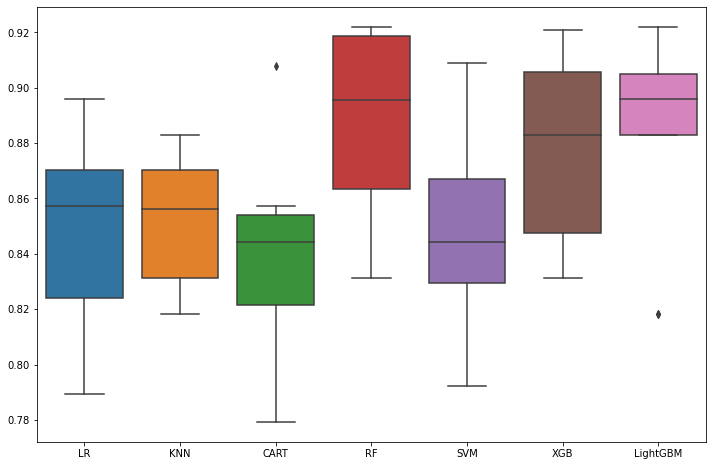

In [74]:
results_df_sc = pd.DataFrame(np.array(results_sc).transpose(),columns=names_sc)
plt.figure(figsize=[12,8])
sns.boxplot(data=results_df_sc)

### original vs scaled data results comparison

<Figure size 864x576 with 0 Axes>

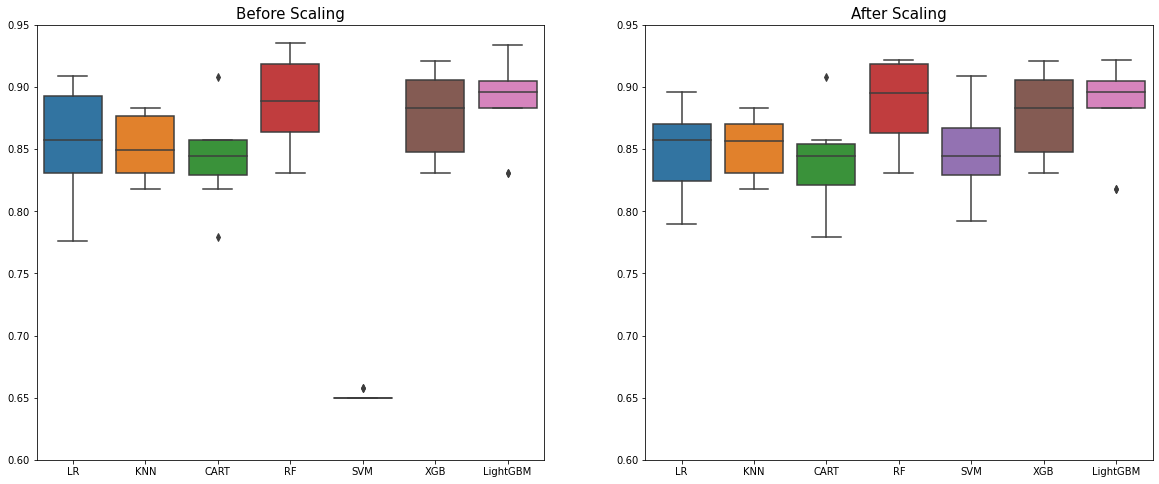

In [114]:
plt.figure(figsize=[12,8])
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.boxplot(data=results_df_i, ax=ax1)
sns.boxplot(data=results_df_sc,ax=ax2)
ax1.set_title('Before Scaling',fontdict={'fontsize':15})
ax1.set_ylim(0.6,0.95)
ax2.set_title('After Scaling',fontdict={'fontsize':15})
ax2.set_ylim(0.6,0.95)
plt.show()



### scaling effect side by side

In [115]:
r_b = results_df_i.copy()
r_b['status'] = 'before_scaling'
r_a = results_df_sc.copy()
r_a['status'] = 'after_scaling'
scaling_comparison_results = pd.concat([r_b,r_a])
scaling_comparison_results

,LR,KNN,CART,RF,SVM,XGB,LightGBM,status
0,0.896104,0.857143,0.857143,0.922078,0.649351,0.896104,0.883117,before_scaling
1,0.844156,0.883117,0.844156,0.883117,0.649351,0.844156,0.896104,before_scaling
2,0.831169,0.844156,0.844156,0.831169,0.649351,0.857143,0.831169,before_scaling
3,0.896104,0.831169,0.831169,0.857143,0.649351,0.844156,0.883117,before_scaling
4,0.870130,0.831169,0.818182,0.844156,0.649351,0.831169,0.831169,before_scaling
5,0.909091,0.883117,0.779221,0.922078,0.649351,0.883117,0.896104,before_scaling
6,0.831169,0.818182,0.857143,0.883117,0.649351,0.883117,0.896104,before_scaling
7,0.883117,0.883117,0.857143,0.935065,0.649351,0.909091,0.922078,before_scaling
8,0.776316,0.855263,0.828947,0.894737,0.657895,0.921053,0.934211,before_scaling
9,0.802632,0.828947,0.907895,0.907895,0.657895,0.921053,0.907895,before_scaling


<AxesSubplot:xlabel='variable', ylabel='value'>

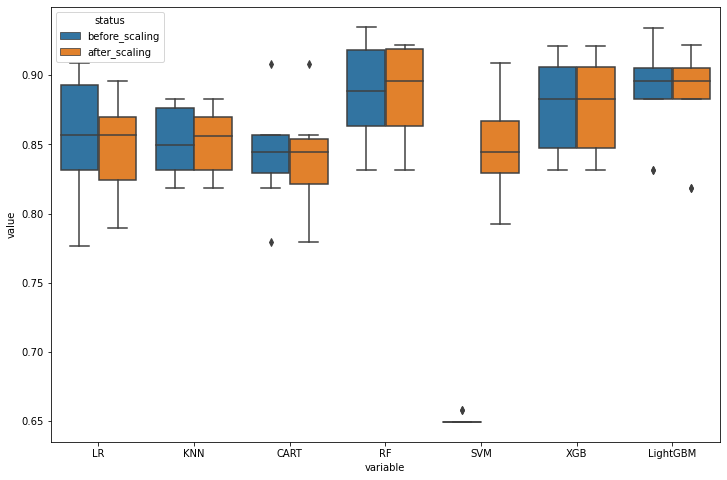

In [116]:
plt.figure(figsize=[12,8])
sns.boxplot(data=scaling_comparison_results.melt(id_vars='status'),x='variable',y='value',hue='status')

the only improvement after scaling is for SVM. 